# IBM Data Science Professional Certificate
## Capstone project
## 'The battle of the Neighborhoods:  How does population density influence business decisions?'
### By Zahra Adahman

### 1. Introduction
#### Background and problem

  An important business strategy is to understand the factor that could be important for maximizing profit. One factor is location of business enterprise. The location of a business can influence the availability of demand and traffic of people seeking goods and services. Higher traffic can drive up the chance of increasing and maintaining profits. High demand of people correlates with location with higher population density. An example of a city with this high population density is New York city. New York city is one of the top ten cities in the world with the highest population density per square mile. New York city is considered the capital of the world, because of its unique multicultural population, and diverse business and entertainment enterprises. In this study, analysis of a good and service, the bakery industry, and the relationship of the population density in different neighborhoods, in the big Apple, are determined. The understanding of the relationship between these population density and the density of bakeries by neighborhood would enlighten business decision for potential stakeholders to determine what neighborhoods need to a particular good or service.

### 2. Data acquisition and cleaning
  The data used for the study were gotten from different sources and via different techniques. The population data, the regular and polygon geoJSON of New York city containing the Manhattan Borough by Neighbourhood were downloaded from the internet. While the data of the top places to go in Manhattan were scraped from the FourSquare site using the developer API access provided by signing up for a developer account with a radius of 500 and limit of 1000 places. The data were sorted and combined into one dataframe for analysis by venue category, bakery. There were some setbacks with the data in the final dataframe. There were some missing neighborhoods in the dataframe of the top places to go in Manhattan (which includes the data of bakeries) and the in the dataframe of the population data. There were some mismatched spelling and alphabetization in neighborhoods in both dataframes, which were edited to correct and match both dataframes for inner joining of the dataframe by the contents in the neighborhood column. About 14 neighborhoods were not present in the population dataframe. Only about 60% of the neighborhoods were matched in the final dataframe.



In [123]:
import numpy as np
from bs4 import BeautifulSoup
import requests
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

from folium import plugins
from folium.plugins import HeatMap

print('Libraries imported.')

Libraries imported.


In [124]:
# @hidden_cell
CLIENT_ID = 'TG1UABJVFI4QA2CAICLRIPYEMN2J0QR0OZCUXRRET2PZDQZO'
CLIENT_SECRET = 'TQJYHQFO3ROVCBN2HLMMFCEZPR4L2HOHMFH2EOPSPI3AK4XY'
VERSION = '20180604' # Foursquare API version

In [129]:
# @hidden_cell
with open('C:\\Users\\zada2\\downloads\\nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)

In [130]:
NY_geo = newyork_data['features']

In [131]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

NY_geodf = pd.DataFrame(columns=column_names)
for data in NY_geo:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY_geodf = NY_geodf.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
NY_geodf.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [132]:
!pip install geopy

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [133]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(NY_geodf['Latitude'], NY_geodf['Longitude'], NY_geodf['Borough'], NY_geodf['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [134]:
#Dataframe with manhanttan borough only
manhattan_data = NY_geodf[NY_geodf['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()


,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [135]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [136]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [137]:
manhattan_data.tail()

,Borough,Neighborhood,Latitude,Longitude
35,Manhattan,Turtle Bay,40.752042,-73.967708
36,Manhattan,Tudor City,40.746917,-73.971219
37,Manhattan,Stuyvesant Town,40.731000,-73.974052
38,Manhattan,Flatiron,40.739673,-73.990947
39,Manhattan,Hudson Yards,40.756658,-74.000111


### 3. Methodology

In [138]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [139]:
#Top 1000 venues in NYC
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
def getplaces (names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    placesNY = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    placesNY.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(placesNY)

In [140]:
#Get places withing Manhattan borough from the top 1000 venues in NYC (all 5 boroughs)

manhattan_venues = getplaces(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [141]:
#Dataframe of top venues in manhanttan
print(manhattan_venues.shape)
manhattan_venues.head()

(3154, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [142]:
#count by venue category
manhattan_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,2,2,2,2,2,2
Adult Boutique,1,1,1,1,1,1
Afghan Restaurant,1,1,1,1,1,1
African Restaurant,2,2,2,2,2,2
American Restaurant,77,77,77,77,77,77
Antique Shop,1,1,1,1,1,1
Arcade,1,1,1,1,1,1
Arepa Restaurant,2,2,2,2,2,2
Argentinian Restaurant,3,3,3,3,3,3


In [143]:
#Sort by bakery: venue category and make data frame

manhattan_sweetsbakery = manhattan_venues[manhattan_venues['Venue Category'].str.contains("Bakery")] 
manhattan_sweetsbakery.head() 
print(manhattan_sweetsbakery.shape)

(72, 7)


In [144]:
# create map of Manhattan using latitude and longitude values
map_manhattan_sweetsbakery = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_sweetsbakery['Neighborhood Latitude'], manhattan_sweetsbakery['Neighborhood Longitude'], manhattan_sweetsbakery['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_sweetsbakery)  
    
map_manhattan_sweetsbakery

In [145]:
#count by Neighborhood to count number of bakery
manhattan_sweetsbakery.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Carnegie Hill,3,3,3,3,3,3
Central Harlem,1,1,1,1,1,1
Chelsea,3,3,3,3,3,3
Chinatown,4,4,4,4,4,4
Civic Center,1,1,1,1,1,1
Clinton,1,1,1,1,1,1
East Harlem,4,4,4,4,4,4
East Village,2,2,2,2,2,2
Financial District,1,1,1,1,1,1


In [146]:
# Bakery store encoding
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_sweetsbakery[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_sweetsbakery['Neighborhood'] 
manhattan_onehot['Neighborhood Latitude'] = manhattan_sweetsbakery['Neighborhood Latitude'] 
manhattan_onehot['Neighborhood Longitude'] = manhattan_sweetsbakery['Neighborhood Longitude'] 


manhattan_onehot[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']]
manhattan_onehot.head()

,Bakery,Neighborhood,Neighborhood Latitude,Neighborhood Longitude
34,1,Chinatown,40.715618,-73.994279
96,1,Chinatown,40.715618,-73.994279
112,1,Chinatown,40.715618,-73.994279
124,1,Chinatown,40.715618,-73.994279
135,1,Washington Heights,40.851903,-73.936900


In [147]:
#needs to be correcly show neibohboods with less bakeries
map_manhattan_sweetsbakery2 = folium.Map(location=[latitude, longitude], zoom_start=11)
# List of lists of bakery Loatitude and Longitude
heat_data = [[row['Neighborhood Latitude'], 
              row['Neighborhood Longitude']] for index, row in manhattan_onehot.iterrows()]
# Plot the bakeries on the map
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(map_manhattan_sweetsbakery2)
map_manhattan_sweetsbakery2

In [148]:
#count by Neighborhood to count number of bakery
manhattan_sweetsbakery2=manhattan_onehot.groupby(['Neighborhood'])['Bakery'].count().reset_index(name="Bakery count")
manhattan_sweetsbakery2

,Neighborhood,Bakery count
0,Carnegie Hill,3
1,Central Harlem,1
2,Chelsea,3
3,Chinatown,4
4,Civic Center,1
5,Clinton,1
6,East Harlem,4
7,East Village,2
8,Financial District,1
9,Flatiron,2


Make dataframe with count of bakeries by neighborhood and the histogram plot of each
How to model and plot the plot clusters? What is the dependet or target viable or just what advice to give buiness person about opening a bakery base don what income?

### Not Good enough, some neighborhoods missing

### The next step is to perform an inner join of the two dataframes based on neighborhood:
### There are a few obstacles here:
1. It was difficult finding data with popultion density for each neighborhood in manhattan.  
2. Hence, the number of neighborhoods doesn't match between the two dataframes. The table from this website was the most diverse I could find, even from the NYC city data site, it wasn't a diverse population data per neighborhood.
3. Some of the neighborhoods names are not the same from the two data frames, so the names of the neighborhood data scrapped from the website using pandas will be editted to match the data from the FourSquare site and the corresponding ones in the geo dataset.

In [150]:
# Instead of beautiful soup use pandas to pull data from the HTML/XML I found.
Manhanttan_pop2=pd.read_html('https://www.worldatlas.com/articles/manhattan-neighborhoods-by-population.html')
for dfManhanttan_pop2 in Manhanttan_pop2:
    print (dfManhanttan_pop2)
dfManhanttan_pop2.head()

    Rank         ﻿Neighborhood  Population
0      1               Midtown      391371
1      2       Lower Manhattan      382654
2      3                Harlem      335109
3      4       Upper East Side      229688
4      5       Upper West Side      209084
5      6    Washington Heights      158318
6      7           East Harlem      115921
7      8             Chinatown      100000
8      9    Lower East Village       72957
9     10         Alphabet City       63347
10    11          East Village       62832
11    12        Lincoln Square       61489
12    13    Financial District       60976
13    14   Morningside Heights       55929
14    15      Hamilton Heights       48520
15    16                Inwood       46746
16    17        Hell's Kitchen       45884
17    18     Battery Park City       39699
18    19               Chelsea       38242
19    20             Yorkville       35221
20    21        Hudson Heights       29000
21    22           Two Bridges       28915
22    23   

,Rank,﻿Neighborhood,Population
0,1,Midtown,391371
1,2,Lower Manhattan,382654
2,3,Harlem,335109
3,4,Upper East Side,229688
4,5,Upper West Side,209084


In [151]:
list(dfManhanttan_pop2.columns) 


['Rank', '\ufeffNeighborhood', 'Population']

In [152]:
dfManhanttan_pop2.rename(columns={'Rank':'Rank','\ufeffNeighborhood':'Neighborhood','Population':'Population'},inplace = True)
list(dfManhanttan_pop2.columns) 

['Rank', 'Neighborhood', 'Population']

In [153]:
dfManhanttan_pop2['Neighborhood']

0                  Midtown
1          Lower Manhattan
2                   Harlem
3          Upper East Side
4          Upper West Side
5       Washington Heights
6              East Harlem
7                Chinatown
8       Lower East Village
9            Alphabet City
10            East Village
11          Lincoln Square
12      Financial District
13     Morningside Heights
14        Hamilton Heights
15                  Inwood
16          Hell's Kitchen
17       Battery Park City
18                 Chelsea
19               Yorkville
20          Hudson Heights
21             Two Bridges
22           Gramercy Park
23                    NoHo
24       Greenwich Village
25         Stuyvesant Town
26               Koreatown
27                    SoHo
28                 Tribeca
29             Murray Hill
30             Marble Hill
31       Flatiron District
32                  NoLita
33                Kips Bay
34    Meatpacking District
35            Little Italy
Name: Neighborhood, dtype: o

In [154]:
# Harlem missing Central in the beginning
dfManhanttan_pop2.at[2,'Neighborhood'] = 'Central Harlem'
#Lower East Village is Lower East Side
dfManhanttan_pop2.at[8,'Neighborhood'] = 'Lower East Side'
#SoHo is Soho
dfManhanttan_pop2.at[27,'Neighborhood'] = 'Soho'
#Gramercy Park is Gramercy
dfManhanttan_pop2.at[22,'Neighborhood'] = 'Gramercy'
#NoHo is Noho
dfManhanttan_pop2.at[23,'Neighborhood'] = 'Noho'
#Flatiron District is Flatiron
dfManhanttan_pop2.at[31,'Neighborhood'] = 'Flatiron'
dfManhanttan_pop2

,Rank,Neighborhood,Population
0,1,Midtown,391371
1,2,Lower Manhattan,382654
2,3,Central Harlem,335109
3,4,Upper East Side,229688
4,5,Upper West Side,209084
5,6,Washington Heights,158318
6,7,East Harlem,115921
7,8,Chinatown,100000
8,9,Lower East Side,72957
9,10,Alphabet City,63347


In [155]:
# Inner join the new population dataframes by Neighborhoods
Manhanttan_bakery_pop2 = pd.merge(dfManhanttan_pop2, manhattan_sweetsbakery2, on='Neighborhood', how='inner')
Manhanttan_bakery_pop2.drop(columns=['Rank'], inplace=True)
Manhanttan_bakery_pop2.reset_index(inplace=True)
print(Manhanttan_bakery_pop2.shape)
Manhanttan_bakery_pop2

(22, 4)


,index,Neighborhood,Population,Bakery count
0,0,Midtown,391371,3
1,1,Central Harlem,335109,1
2,2,Upper East Side,229688,4
3,3,Upper West Side,209084,3
4,4,Washington Heights,158318,4
5,5,East Harlem,115921,4
6,6,Chinatown,100000,4
7,7,Lower East Side,72957,2
8,8,East Village,62832,2
9,9,Lincoln Square,61489,2


### Still,  14 neighborhoods from the bakery dataframe are missing

In [156]:
# Inner join the new bakery with geo dataframes by Neighborhoods
Manhanttan_bakery_pop3 = pd.merge(Manhanttan_bakery_pop2, NY_geodf, on='Neighborhood', how='inner')
Manhanttan_bakery_pop3.drop(columns=['Borough'], inplace=True)
Manhanttan_bakery_pop3.reset_index(inplace=True)
print(Manhanttan_bakery_pop3.shape)
Manhanttan_bakery_pop3

(24, 7)


,level_0,index,Neighborhood,Population,Bakery count,Latitude,Longitude
0,0,0,Midtown,391371,3,40.754691,-73.981669
1,1,1,Central Harlem,335109,1,40.815976,-73.943211
2,2,2,Upper East Side,229688,4,40.775639,-73.960508
3,3,3,Upper West Side,209084,3,40.787658,-73.977059
4,4,4,Washington Heights,158318,4,40.851903,-73.936900
5,5,5,East Harlem,115921,4,40.792249,-73.944182
6,6,6,Chinatown,100000,4,40.715618,-73.994279
7,7,7,Lower East Side,72957,2,40.717807,-73.980890
8,8,8,East Village,62832,2,40.727847,-73.982226
9,9,9,Lincoln Square,61489,2,40.773529,-73.985338


In [157]:
list(Manhanttan_bakery_pop3.columns)

['level_0',
 'index',
 'Neighborhood',
 'Population',
 'Bakery count',
 'Latitude',
 'Longitude']

In [158]:
Manhanttan_bakery_pop3.drop(columns=['level_0','index'], inplace=True)
Manhanttan_bakery_pop3

,Neighborhood,Population,Bakery count,Latitude,Longitude
0,Midtown,391371,3,40.754691,-73.981669
1,Central Harlem,335109,1,40.815976,-73.943211
2,Upper East Side,229688,4,40.775639,-73.960508
3,Upper West Side,209084,3,40.787658,-73.977059
4,Washington Heights,158318,4,40.851903,-73.936900
5,East Harlem,115921,4,40.792249,-73.944182
6,Chinatown,100000,4,40.715618,-73.994279
7,Lower East Side,72957,2,40.717807,-73.980890
8,East Village,62832,2,40.727847,-73.982226
9,Lincoln Square,61489,2,40.773529,-73.985338


In [161]:
#Drop Neighborhood duplicates
Manhanttan_bakery_pop3=Manhanttan_bakery_pop3.drop_duplicates(subset='Neighborhood', keep='first', inplace=False)
Manhanttan_bakery_pop3

,Neighborhood,Population,Bakery count,Latitude,Longitude
0,Midtown,391371,3,40.754691,-73.981669
1,Central Harlem,335109,1,40.815976,-73.943211
2,Upper East Side,229688,4,40.775639,-73.960508
3,Upper West Side,209084,3,40.787658,-73.977059
4,Washington Heights,158318,4,40.851903,-73.936900
5,East Harlem,115921,4,40.792249,-73.944182
6,Chinatown,100000,4,40.715618,-73.994279
7,Lower East Side,72957,2,40.717807,-73.980890
8,East Village,62832,2,40.727847,-73.982226
9,Lincoln Square,61489,2,40.773529,-73.985338


In [162]:
# @hidden_cell
with open('C:\\Users\\zada2\\downloads\\nyu-polygon-geojson.json') as json_data1:
    nyc_polygon_geo= json.load(json_data1)
latitude = 40.8021285
longitude = -73.9777254

print('Data downloaded!')

Data downloaded!


In [ ]:
#Polygon NYC geo.json:'https://geo.nyu.edu/catalog/nyu-2451-34561'

In [163]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

#Map of neighborhood density and bakery count by neighnour hood
map_manhattan_popul_bakery = folium.Map(location=[latitude, longitude], zoom_start=11)
# generate choropleth map to show population distribution within Manhattan Neighbourhoods
folium.Choropleth(
    geo_data=nyc_polygon_geo,
    data=Manhanttan_bakery_pop3,
    columns=['Neighborhood', 'Population'],
    key_on='feature.properties.neighborhood',
    fill_color='YlOrRd', 
    fill_opacity=0.5, 
    line_opacity=0.2,
    legend_name='Population density within Manhattan Neighborhoods').add_to(map_manhattan_popul_bakery)


    
map_manhattan_popul_bakery


In [167]:
list(Manhanttan_bakery_pop3.columns) 


['Neighborhood', 'Population', 'Bakery count']

### Regression plot: To visualize relationship between population density and bakery count...

,Neighborhood,Population,Bakery count
0,Midtown,391371,3
1,Central Harlem,335109,1
2,Upper East Side,229688,4
3,Upper West Side,209084,3
4,Washington Heights,158318,4
5,East Harlem,115921,4
6,Chinatown,100000,4
7,Lower East Side,72957,2
8,East Village,62832,2
9,Lincoln Square,61489,2


In [191]:
Manhanttan_bakery_pop3.rename(columns={'Bakery count':'Bakerycount'},inplace = True)
list(Manhanttan_bakery_pop3.columns) 

['Neighborhood', 'Population', 'Bakerycount']

### 4. Results

Text(0.5, 1.0, 'Relationship between population density and bakeries in Manhattan NYC')

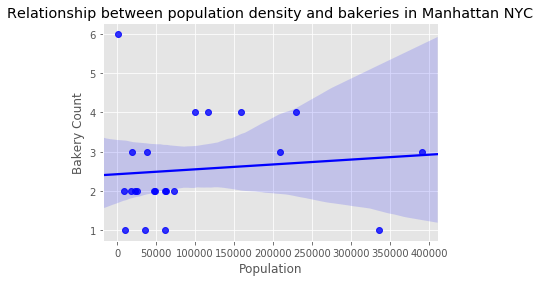

In [192]:
#Plot data using seaborn
import seaborn as sns
ax1 = sns.regplot(x='Population', y='Bakerycount', data=Manhanttan_bakery_pop3, color='blue')
ax1.set(xlabel='Population', ylabel='Bakery Count') # add x- and y-labels
ax1.set_title('Relationship between population density and bakeries in Manhattan NYC') # add title

### Relationship isn't linear, let's try polynomial regression

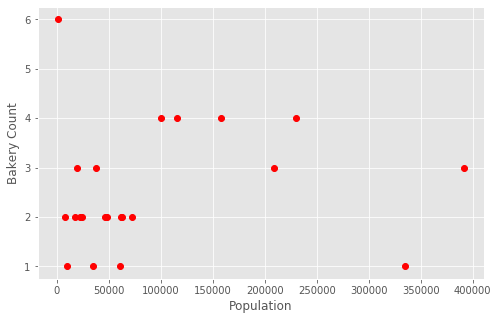

In [193]:
# Plot data
plt.figure(figsize=(8,5))
x_data, y_data = (Manhanttan_bakery_pop3["Population"].values, Manhanttan_bakery_pop3["Bakerycount"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Bakery Count')
plt.xlabel('Population')
plt.show()


In [194]:
#Create train and test data
msk = np.random.rand(len(Manhanttan_bakery_pop2)) < 0.8
train = Manhanttan_bakery_pop3[msk]
test = Manhanttan_bakery_pop3[~msk]

In [195]:
#Polynomial fit of 2 power
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Population']])
train_y = np.asanyarray(train[['Bakerycount']])

test_x = np.asanyarray(test[['Population']])
test_y = np.asanyarray(test[['Bakerycount']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 3.91371000e+05, 1.53171260e+11],
       [1.00000000e+00, 2.09084000e+05, 4.37161191e+10],
       [1.00000000e+00, 1.58318000e+05, 2.50645891e+10],
       [1.00000000e+00, 1.15921000e+05, 1.34376782e+10],
       [1.00000000e+00, 7.29570000e+04, 5.32272385e+09],
       [1.00000000e+00, 6.28320000e+04, 3.94786022e+09],
       [1.00000000e+00, 6.14890000e+04, 3.78089712e+09],
       [1.00000000e+00, 6.09760000e+04, 3.71807258e+09],
       [1.00000000e+00, 4.85200000e+04, 2.35419040e+09],
       [1.00000000e+00, 4.67460000e+04, 2.18518852e+09],
       [1.00000000e+00, 3.52210000e+04, 1.24051884e+09],
       [1.00000000e+00, 2.27850000e+04, 5.19156225e+08],
       [1.00000000e+00, 1.95730000e+04, 3.83102329e+08],
       [1.00000000e+00, 1.73620000e+04, 3.01439044e+08],
       [1.00000000e+00, 1.02840000e+04, 1.05760656e+08],
       [1.00000000e+00, 8.54700000e+03, 7.30512090e+07],
       [1.00000000e+00, 1.21100000e+03, 1.46652100e+06]])

In [196]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.00000000e+00  4.54239284e-06 -4.70396205e-12]]
Intercept:  [2.1834422]


Text(0, 0.5, 'Bakery Count')

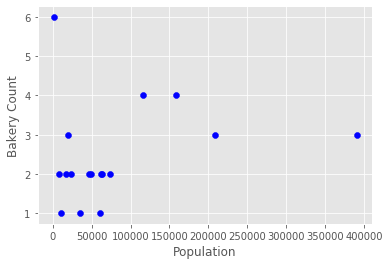

In [197]:
plt.scatter(train.Population, train.Bakerycount,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Population")
plt.ylabel("Bakery Count")

In [198]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 1.11
Residual sum of squares (MSE): 1.66
R2-score: -12.74


 These results don't show a significant relationship between bakeries and population density for a polynomial fit at a power of 2. The R^2 score is negative. There is no significant coefficient correlations. Let's try a fit of the power of 6.


In [201]:
# Poly fit power of 6
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['Population']])
train_y = np.asanyarray(train[['Bakerycount']])

test_x = np.asanyarray(test[['Population']])
test_y = np.asanyarray(test[['Bakerycount']])


poly2 = PolynomialFeatures(degree=6)
train_x_poly = poly2.fit_transform(train_x)
train_x_poly

array([[1.00000000e+00, 3.91371000e+05, 1.53171260e+11, 5.99467891e+16,
        2.34614348e+22, 9.18212519e+27, 3.59361752e+33],
       [1.00000000e+00, 2.09084000e+05, 4.37161191e+10, 9.14034104e+15,
        1.91109907e+21, 3.99580237e+26, 8.35458343e+31],
       [1.00000000e+00, 1.58318000e+05, 2.50645891e+10, 3.96817562e+15,
        6.28233628e+20, 9.94606915e+25, 1.57464178e+31],
       [1.00000000e+00, 1.15921000e+05, 1.34376782e+10, 1.55770910e+15,
        1.80571197e+20, 2.09319937e+25, 2.42645764e+30],
       [1.00000000e+00, 7.29570000e+04, 5.32272385e+09, 3.88329964e+14,
        2.83313892e+19, 2.06697316e+24, 1.50800161e+29],
       [1.00000000e+00, 6.28320000e+04, 3.94786022e+09, 2.48051954e+14,
        1.55856003e+19, 9.79274441e+23, 6.15297717e+28],
       [1.00000000e+00, 6.14890000e+04, 3.78089712e+09, 2.32483583e+14,
        1.42951830e+19, 8.78996510e+23, 5.40486164e+28],
       [1.00000000e+00, 6.09760000e+04, 3.71807258e+09, 2.26713193e+14,
        1.38240637e+19, 8

In [202]:
clf2 = linear_model.LinearRegression()
train_y_ = clf2.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf2.coef_)
print ('Intercept: ',clf2.intercept_)

Coefficients:  [[ 0.00000000e+00  2.55041210e-24  2.26032192e-30  2.76001465e-25
   1.95239694e-20 -1.38697112e-25  2.27167686e-31]]
Intercept:  [2.12004753]


Text(0, 0.5, 'Bakery Count')

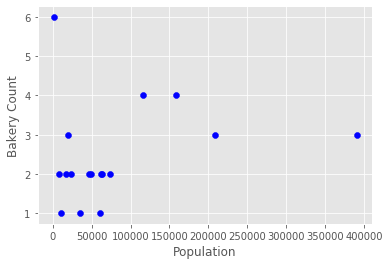

In [204]:
plt.scatter(train.Population, train.Bakerycount,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf2.intercept_[0]+ clf2.coef_[0][1]*XX+ clf2.coef_[0][2]*np.power(XX, 2)+clf2.coef_[0][3]*np.power(XX, 3)+clf2.coef_[0][4]*np.power(XX, 4)+clf2.coef_[0][5]*np.power(XX, 5)+clf2.coef_[0][6]*np.power(XX, 6)
plt.plot(XX, yy, '-r' )
plt.xlabel("Population")
plt.ylabel("Bakery Count")

In [207]:
from sklearn.metrics import r2_score

test_x_poly = poly2.fit_transform(test_x)
test_y_ = clf2.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 4.40
Residual sum of squares (MSE): 60.44
R2-score: -0.14


 ### 5. Conclusion and discussion
 These results still don't show a significant relationship between bakeries and population density for a polynomial fit at a power of 6. However, the R^2 score increased. 
 
There is no significant correlations or realtonship between the number of bakeries and population density. Business associates are advised to look at other variables such as access to public transportation, distribution of schools, parks and so on in different neighbourhoods in a city to determine where to open a bakery for the highest profit possible.

## Thank you